<a href="https://colab.research.google.com/github/analyst-rhie/Kaggle/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC_%EC%97%B0%EC%8A%B5%EC%9E%A5_%EC%97%90%EC%BD%94%EC%9E%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 타이타닉 연습 Part 2

* 본 코드는 이유한님의 타이타닉 튜토리얼 코드를 이해 및 암기하기 위한 목적으로 작성되었습니다.
* 출처 : https://kaggle-kr.tistory.com/18?category=868316

In [319]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

1. df_train, df_test이름으로 타이타닉 train, test 데이터셋을 저장하라
* /content/drive/MyDrive/Colab Notebooks/타이타닉/
2. SibSp, Parch 그리고 자기자신을 더한 Familysize 변수를 추가하라
3. Fare의 결측값을 평균으로 대체하라 (train, test 모두)
4. Fare값을 log를 취해 Fare변수로 저장하라(train, test 모두)

In [320]:
#1차 시도

데이터를 불러오고 train, test셋 두개를 하나로 합쳐라.
* 데이터 결합 참고 블로그
  * https://yganalyst.github.io/data_handling/Pd_12/

In [321]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/test.csv')

df = pd.concat([df_train, df_test], ignore_index=True)

train, test 모두 Initial이라는 변수를 생성하여 Name변수에서 .전의 모든 문자를 가져와라. 정규식 : '([A-Za-z]+)\.'

In [322]:
df['Initial'] = df['Name'].str.extract('([A-Za-z]+)\.')

In [323]:
df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

trian의 Initial변수와 성별의 교차표를 만들어라. 이때 행은 성별, 열은 inital이 들어가게 해라

In [324]:
pd.crosstab(df['Initial'],df['Sex']).T.style.background_gradient('summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


Initial의 값인 1을 2로 대응되게 바꾸는 코드를 작성해라. (train, test 모두)
* 1. ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona']
* 2. ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr']

In [325]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],\
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],\
                      inplace= True)

In [326]:
df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

train의 Initial별 모든 열의 평균값을 구해라

In [327]:
df.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,36.008195
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,42.667628
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,25.316303
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,50.686244
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,35.919231


train의 Initial별 Survived의 평균 막대그래프를 그려라

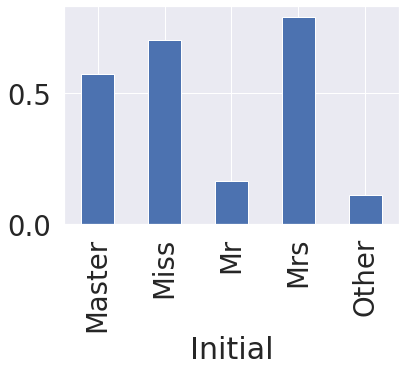

In [328]:
df.groupby('Initial')['Survived'].mean().plot.bar()

train의 Initial을 이용해 각 Initial의 Age평균값을 Age Null값에 대체해라

test도 위의 과정으로 Age Null값을 대체하라

In [346]:
age_gp = df.groupby('Initial')['Age'].mean()

for i,j in zip(age_gp, range(len(age_gp))):
  df.loc[(df.Age.isnull()) & (df.Initial==age_gp.index[j]),'Age']=i

In [345]:
# 값이 잘 바뀌였는지 확인
#df.loc[(np.isnan(df.Age))&((df['Age']==df['Age2'])==False), ['Initial','Age','Age2']]

,Initial,Age,Age2
5,Mr,NaN,32.556397
17,Mr,NaN,32.556397
19,Mrs,NaN,37.034884
26,Mr,NaN,32.556397
28,Miss,NaN,21.834533
...,...,...,...
1299,Miss,NaN,21.834533
1301,Miss,NaN,21.834533
1304,Mr,NaN,32.556397
1307,Mr,NaN,32.556397


Train의 Embarked 변수의 최빈값을 구하고 이 최빈값으로 NUll을 대체하라

In [352]:
df.Embarked.mode()

df.loc[df.Embarked.isnull(), 'Embarked'] = df.Embarked.mode()[0]

In [355]:
df.drop(['Embarked1','Age2'], axis=1, inplace= True)

fillna 함수를 이용해서 위의 Embarked를 대체해라

In [356]:
df['Embarked'].fillna(df.Embarked.mode()[0])

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object

train, test셋에 Age_cat이라는 변수에 Age를 10살 간격으로 나누어 카테고리 변수를 생성해라

* hint : for문, range, array 속성을 이용해라

In [364]:
# Age_cate 0~9 = 0,10~19 =1, 20~29, 30~39, ... 
ag = [x for x in range(0,80,10)]

for i in ag :
  ag_level = i/10 
  df.loc[(df.Age >= i) & (df.Age < (i+10)), 'Age_cat'] = ag_level
  df.loc[(df.Age >= 80), 'Age_cat'] = 7

In [365]:
df.loc[df.Age==80,['Age','Age_cat']]

,Age,Age_cat
630,80.0,7.0


위의과정과 결과가 같지만, apply를 이용해서 age를 10세 단위로 분류한 Age_cate2 변수를 만들어라
* apply와 map은 같으나, apply는 pandas(Series, dataframe)에서 동작하여 일반 전통적인 python(리스트 등)에서는 동작이 안됨. 이때 map을 사용함.
  * https://www.inflearn.com/questions/152704

In [367]:
def Age_category(x):
  if x<10 :
    return 0
  elif x<20 :
    return 1
  elif x<30 :
    return 2
  elif x<40 :
    return 3
  elif x<50 :
    return 4
  elif x<60 :
    return 5
  elif x<70 :
    return 6
  else :
    return 7
df['Age_cat_2'] = df['Age'].apply(Age_category)

age를 10간격으로 바꾸는 방법을 두가지를 위에서 했었다. 이의 결과가 같은지 체크 해라.
* hint : all()메소드를 사용해라

In [369]:
(df.Age_cat==df.Age_cat_2).all()

True

Initial의 각 값을 수치에 대응시켜라
Master는 0 , Miss 1... 등등
* 예시와 동일하게 하기 위해 map을 이용해 노가다 해라
* map 관련 포스트 
  * https://coding-grandpa.tistory.com/entry/Lambda-Map
  * map에 딕셔너리를 넣을 경우 딕셔너리에 없는 값은 NaN으로 반환되니 주의해야 한다.

Embarked의 유니크한 값을 출력하고 이를 각각 1,2,3에 대응되게 바꾸어라

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

성별(Sex)
도 위의 과정을 거쳐 여자면 0, 남자면 1인 코드를 작성해라

In [ ]:
#아래 방법으로 작성도 가능하나 0과 1뿐인데 변수가 2개가 생긴다. 때문에 위의 과정을 거쳐서 만들도록 하자.
#df_train = pd.get_dummies(df_train, columns=['Sex'], prefix = 'Sex')
#df_train.drop(['Sex_female','Sex_male'],axis=1, inplace=True)


피어슨 상관계수를 히트맵을 통해 그려라.
이때 0과 1로 코딩된 명목형 변수를 포함할 수 있다.
* 이유한님은 Initial을 상관계수 행렬에 포함시켰으나 이는 적절하지 않아보임.
* colormap = plt.cm.RdBu
* 반드시 히트맵위에 상관계수 값이 보이도록 할 것
* ['Survived','Pclass','Sex','Fare' ,'Embarked','Age_cat'] 변수를 활용해라 

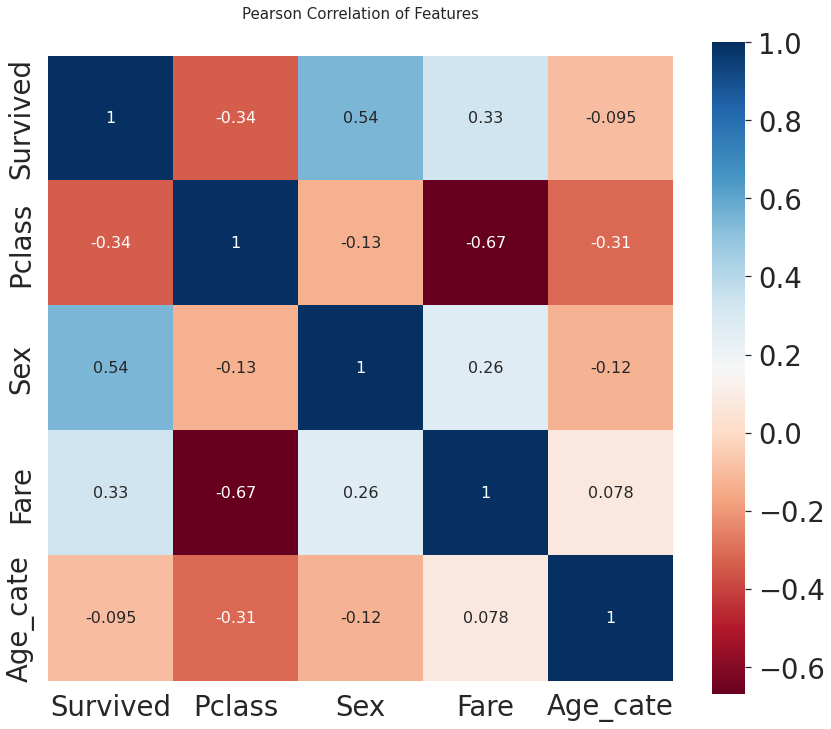

Initial, Embarked을 One-hot 인코딩하여라

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Familysize,Age_cate,Age_cate2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,NaN,2,2.0,2,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,2,3.0,3,0,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,1,2.0,2,0,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,2,3.0,3,0,1,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,NaN,1,3.0,3,1,0,0,0,0,1,0,0


* category가 100가 넘는 경우에는 학습시 버겁게 되 다른 방법을 사용한다.
> Frequency, Target Encoding

'PassengerId', 'Name', 'SibSp', 'Parch','Age','Ticket', 'Cabin' 변수를 제거하라

### 머신러닝 빌드 하기
* sklearn의 ensemble 의 RandomForestClassifier
* sklearn의 metris
* sklearn의 model selection을 불러와라

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

학습에 쓰일 데이터와 target label인 Survived를 분리하고 각 저장된 개체는 array문으로 바꿔라

train_test_split 함수를 이용해 train셋을 분리해라
* random_state = 2018으로 고정해라

아무 튜닝없이 랜덤포레스트를 적용시켜라
* hint. model 설정 / 모델 적합 / 모델 예측 

0.8544776119402985

가장 영향을 많이 주는 변수를 순서대로 그래프를 그려라.
* feature importances와 pandas series로 sorting하여 그래프 그릴 수 있음.
* from pandas import Series


In [ ]:
from pandas import Series


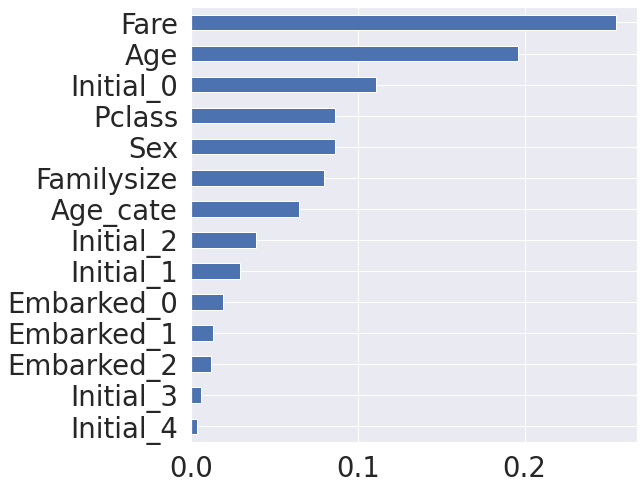

* 시도 횟수
* 반복일(Echoing)
  * 21.10.12
  * 21.10.13
* 안보고치기(Shadowing)